# Implementing ANN- Desnse Layer for Binary Classification

In [7]:
from tensorflow.keras.datasets import imdb
(X_train,y_train) , (X_test, y_test) = imdb.load_data(num_words = 10000)

In [8]:
import numpy as np 
def vectorize_sequences(sequences , dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [10]:
#You should also vectorize your labels, which is straightforward:
y_train = np.asarray(y_train).astype("float32")
y_test = np.asarray(y_test).astype("float32")

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([layers.Dense(16, activation="relu"),layers.Dense(16, activation="relu"),layers.Dense(1, activation="sigmoid")])

In [12]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [15]:
#Setting aside a validation set
x_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_X_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 22s 175ms/step - loss: 0.5555 - accuracy: 0.7555 - val_loss: 0.4384 - val_accuracy: 0.8481
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3570 - accuracy: 0.8875 - val_loss: 0.3378 - val_accuracy: 0.8771
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2662 - accuracy: 0.9145 - val_loss: 0.2994 - val_accuracy: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2139 - accuracy: 0.9301 - val_loss: 0.2844 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1798 - accuracy: 0.9421 - val_loss: 0.2979 - val_accuracy: 0.8803
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1512 - accuracy: 0.9527 - val_loss: 0.2826 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1294 - accuracy: 0.9625 - val_loss: 0.3008 - val_accuracy: 0.8820
Epoch 8/20


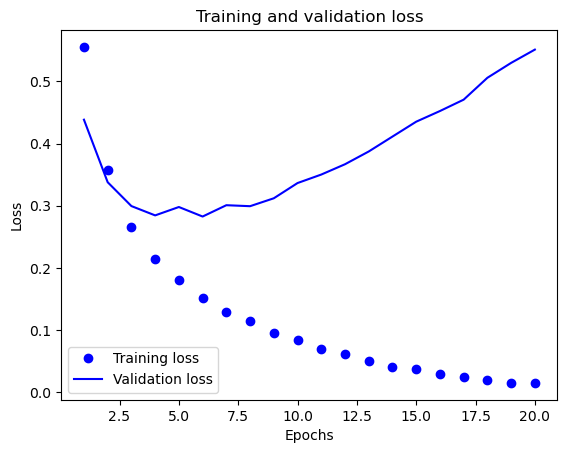

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [19]:
history

In [20]:
history.historystory

{'loss': [0.5555365681648254,
  0.3569875657558441,
  0.2662135362625122,
  0.2138880342245102,
  0.17975221574306488,
  0.15119004249572754,
  0.12943923473358154,
  0.11393097043037415,
  0.09565670043230057,
  0.08403801918029785,
  0.06892818212509155,
  0.060834866017103195,
  0.049721162766218185,
  0.04004037007689476,
  0.03768601641058922,
  0.02938663214445114,
  0.02486310340464115,
  0.02034398727118969,
  0.014847795478999615,
  0.015103491954505444],
 'accuracy': [0.755466639995575,
  0.8875333070755005,
  0.9145333170890808,
  0.9301333427429199,
  0.9420666694641113,
  0.9526666402816772,
  0.9625333547592163,
  0.965666651725769,
  0.9730666875839233,
  0.9772666692733765,
  0.9833999872207642,
  0.9852666854858398,
  0.9894000291824341,
  0.9931333065032959,
  0.9919333457946777,
  0.9951333403587341,
  0.9967333078384399,
  0.9969333410263062,
  0.9991333484649658,
  0.9982666373252869],
 'val_loss': [0.4384375512599945,
  0.33781152963638306,
  0.2994192838668823,
 

In [21]:
import pandas as pd

In [22]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.555537,0.755467,0.438438,0.8481
1,0.356988,0.887533,0.337812,0.8771
2,0.266214,0.914533,0.299419,0.8829
3,0.213888,0.930133,0.284443,0.8877
4,0.179752,0.942067,0.297925,0.8803
5,0.151190,0.952667,0.282603,0.8865
6,0.129439,0.962533,0.300824,0.8820
7,0.113931,0.965667,0.299245,0.8865
8,0.095657,0.973067,0.311978,0.8832
9,0.084038,0.977267,0.336482,0.8781


In [23]:
#re-training the model from scratch, because after 4 epochs the model started overfitting

model = keras.Sequential([
layers.Dense(16, activation="relu"),layers.Dense(16, activation="relu"),layers.Dense(1, activation="sigmoid")])

In [25]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
49/49 [==============================] - 12s 28ms/step - loss: 0.4733 - accuracy: 0.8115
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2807 - accuracy: 0.9012
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2207 - accuracy: 0.9209
Epoch 4/4
782/782 [==============================] - 58s 54ms/step - loss: 0.3065 - accuracy: 0.8767


In [26]:
results

[0.30645298957824707, 0.8767200112342834]

In [30]:
review=model.predict(X_test[0].reshape(1,10000))

1/1 [==============================] - 0s 83ms/step


In [29]:
y_test[0]

0.0

In [31]:
review

array([[0.18389425]], dtype=float32)

In [33]:
review[0][0]

0.18389425

In [41]:
def predict_review(review):
    print(review[0][0])
    if review[0][0] < 0.5:
        return "below avg Review"
    else:
        return "good review"

In [42]:
predict_review(model.predict(X_test[1].reshape(1,10000)))

1/1 [==============================] - 0s 60ms/step
0.9997162


'good review'